# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Temperature units
units = 'Imperial'

# Output File (CSV)
output_data_file = "output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lats = []
city_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lats.append(lat_lng[0])
        city_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count

print(len(cities))
print(len(city_lats))
print(len(city_lngs))

634
634
634


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temps = []
humidities = []
clouds = []
wind = []

for city in cities:
    target_city = city
    target_url = f'{base_url}q={target_city}&appid={weather_key}&units={units}'
    target_city_index = cities.index(city) + 1
    city_data = requests.get(target_url).json()
    
    print(f'#{target_city_index} - Getting data from {target_city}')
    try:
        temps.append(city_data['main']['temp'])
    except:
        temps.append("NAN")
        print(f'No temperature data for {target_city}, skipping...')
        
    try:
        humidities.append(city_data['main']['humidity'])
    except:
        humidities.append("NAN")
        print(f'No humidity data for {target_city}, skipping...')
        
    try:
        clouds.append(city_data['clouds']['all'])
    except:
        clouds.append("NAN")
        print(f'No cloud coverage data for {target_city}, skipping...')

    try:
        wind.append(city_data['wind']['speed'])
    except:
        wind.append("NAN")
        print(f'No wind data for {target_city}, skipping...')
        
print(len(temps))
print(len(humidities))
print(len(clouds))
print(len(wind))

#1 - Getting data from puerto ayora
#2 - Getting data from ushuaia
#3 - Getting data from mataura
#4 - Getting data from lagoa
#5 - Getting data from east london
#6 - Getting data from port elizabeth
#7 - Getting data from khormuj
No temperature data for khormuj, skipping...
No humidity data for khormuj, skipping...
No cloud coverage data for khormuj, skipping...
No wind data for khormuj, skipping...
#8 - Getting data from vaini
#9 - Getting data from kahului
#10 - Getting data from atuona
#11 - Getting data from gizo
#12 - Getting data from sao joao da barra
#13 - Getting data from rikitea
#14 - Getting data from zhob
#15 - Getting data from hermanus
#16 - Getting data from nelson bay
#17 - Getting data from punta arenas
#18 - Getting data from pangnirtung
#19 - Getting data from busselton
#20 - Getting data from pemberton
#21 - Getting data from provideniya
#22 - Getting data from kaitangata
#23 - Getting data from sao filipe
#24 - Getting data from illoqqortoormiut
No temperature da

#167 - Getting data from cabo san lucas
#168 - Getting data from mys shmidta
No temperature data for mys shmidta, skipping...
No humidity data for mys shmidta, skipping...
No cloud coverage data for mys shmidta, skipping...
No wind data for mys shmidta, skipping...
#169 - Getting data from kawalu
#170 - Getting data from semnan
#171 - Getting data from voh
#172 - Getting data from qazvin
#173 - Getting data from rocha
#174 - Getting data from tuxpan
#175 - Getting data from waipawa
#176 - Getting data from belushya guba
No temperature data for belushya guba, skipping...
No humidity data for belushya guba, skipping...
No cloud coverage data for belushya guba, skipping...
No wind data for belushya guba, skipping...
#177 - Getting data from akyab
#178 - Getting data from orlik
#179 - Getting data from cherskiy
#180 - Getting data from san patricio
#181 - Getting data from banjar
#182 - Getting data from markova
#183 - Getting data from kosh-agach
#184 - Getting data from bairiki
#185 - Ge

#340 - Getting data from kiruna
#341 - Getting data from ellisras
#342 - Getting data from carlyle
#343 - Getting data from ouro preto do oeste
#344 - Getting data from hobyo
#345 - Getting data from antofagasta
#346 - Getting data from lolua
No temperature data for lolua, skipping...
No humidity data for lolua, skipping...
No cloud coverage data for lolua, skipping...
No wind data for lolua, skipping...
#347 - Getting data from arman
#348 - Getting data from lensk
#349 - Getting data from yangambi
#350 - Getting data from avera
#351 - Getting data from saint-georges
#352 - Getting data from antalaha
#353 - Getting data from muroto
#354 - Getting data from caarapo
#355 - Getting data from narsaq
#356 - Getting data from neiafu
#357 - Getting data from cranbrook
#358 - Getting data from mayo
#359 - Getting data from bonavista
#360 - Getting data from alta floresta
#361 - Getting data from tual
#362 - Getting data from haibowan
No temperature data for haibowan, skipping...
No humidity da

#520 - Getting data from bumba
#521 - Getting data from solsvik
No temperature data for solsvik, skipping...
No humidity data for solsvik, skipping...
No cloud coverage data for solsvik, skipping...
No wind data for solsvik, skipping...
#522 - Getting data from jalu
#523 - Getting data from la ronge
#524 - Getting data from high level
#525 - Getting data from bundaberg
#526 - Getting data from sinnamary
#527 - Getting data from shishou
#528 - Getting data from ottumwa
#529 - Getting data from samarkand
#530 - Getting data from lander
#531 - Getting data from college station
#532 - Getting data from octeville
#533 - Getting data from rancho palos verdes
#534 - Getting data from menomonie
#535 - Getting data from dwarka
#536 - Getting data from consett
#537 - Getting data from segezha
#538 - Getting data from aripuana
#539 - Getting data from ikongo
#540 - Getting data from duverge
#541 - Getting data from half moon bay
#542 - Getting data from petropavlovsk-kamchatskiy
#543 - Getting da

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City': cities, 'Latitude': city_lats, 'Longitude': city_lngs, 'Temperature \N{DEGREE SIGN}F': temps, 'Humidity (%)': humidities, 'Cloud Coverage (%)': clouds, 'Wind Speed (MPH)': wind})
weather_df['City'] = weather_df['City'].str.title()

weather_df['Temperature \N{DEGREE SIGN}F'] = weather_df['Temperature \N{DEGREE SIGN}F'].astype(float)
weather_df['Humidity (%)'] = weather_df['Humidity (%)'].astype(float)
weather_df['Cloud Coverage (%)'] = weather_df['Cloud Coverage (%)'].astype(float)
weather_df['Wind Speed (MPH)'] = weather_df['Wind Speed (MPH)'].astype(float)
# weather_df.dtypes

In [5]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_100 = weather_df.loc[weather_df['Humidity (%)'] >= 100]
print(f'There are {len(humid_100)} cities where the humidity is greater than 100%')
print(f'Dropping these {len(humid_100)} cities')
weather_df = weather_df.loc[weather_df['Humidity (%)'] < 100]
print(f'There are now {len(weather_df)} cities in the dataframe.')

There are 7 cities where the humidity is greater than 100%
Dropping these 7 cities
There are now 579 cities in the dataframe.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The data unsuprisingly shows that the temperature increases as you near the equator (0° latitude).
If there was more data points in the southern hemisphere (< 0° latitude), this upside-down "u" shape would likely continue.


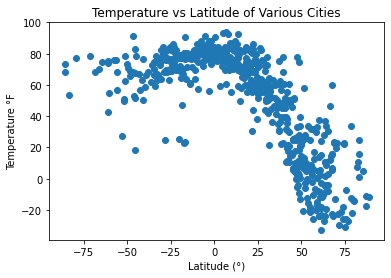

In [7]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature \N{DEGREE SIGN}F'])
plt.title('Temperature vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Temperature \N{DEGREE SIGN}F')
plt.savefig('output_data/Temperature-vs-Latitude.png')
print('The data unsuprisingly shows that the temperature increases as you near the equator (0\N{DEGREE SIGN} latitude).')
print('If there was more data points in the southern hemisphere (< 0\N{DEGREE SIGN} latitude), this upside-down "u" shape would likely continue.')

## Latitude vs. Humidity Plot

According to this sample, there does not seem to be a clear relationship between latitude and humidity.
Humidity is likely related to either longitude, altitude, current weather or other factors.


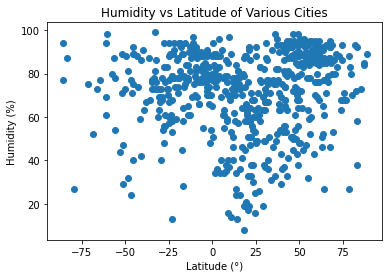

In [8]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'])
plt.title('Humidity vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Humidity-vs-Latitude.png')
print('According to this sample, there does not seem to be a clear relationship between latitude and humidity.')
print('Humidity is likely related to either longitude, altitude, current weather or other factors.')

## Latitude vs. Cloudiness Plot

According to this sample, there does not seem to be a clear relationship between latitude and cloudiness.
Cloudiness is likely related to either longitude, altitude, current weather or other factors.
It appears that the API data source frequently measures cloudiness to the nearest multiple of 5 or 10, as there are several data points at these values.


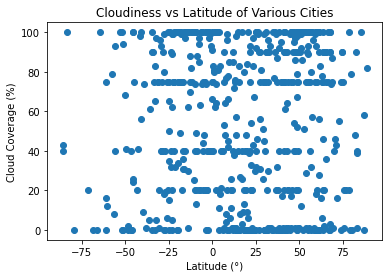

In [9]:
plt.scatter(weather_df['Latitude'], weather_df['Cloud Coverage (%)'])
plt.title('Cloudiness vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Cloud Coverage (%)')
plt.savefig('output_data/Cloudiness-vs-Latitude.png')
print('According to this sample, there does not seem to be a clear relationship between latitude and cloudiness.')
print('Cloudiness is likely related to either longitude, altitude, current weather or other factors.')
print('It appears that the API data source frequently measures cloudiness to the nearest multiple of 5 or 10, as there are several data points at these values.')

## Latitude vs. Wind Speed Plot

According to this sample, there does not seem to be a clear relationship between latitude and wind speed.
Wind speed is likely related to either longitude, altitude, current weather or other factors.


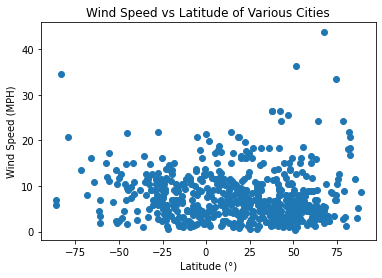

In [10]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (MPH)'])
plt.title('Wind Speed vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/Wind-Speed-vs-Latitude.png')
print('According to this sample, there does not seem to be a clear relationship between latitude and wind speed.')
print('Wind speed is likely related to either longitude, altitude, current weather or other factors.')

## Linear Regression

In [11]:
north_data = weather_df.loc[weather_df['Latitude'] >= 0]
print(f'There are {len(north_data)} cities in the Northen Hemisphere in the dataset')
south_data = weather_df.loc[weather_df['Latitude'] <= 0]
print(f'There are {len(south_data)} cities in the Southern Hemisphere in the dataset')

There are 390 cities in the Northen Hemisphere in the dataset
There are 189 cities in the Southern Hemisphere in the dataset


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a negative correlation between temperature and latitude in the northern hemisphere.


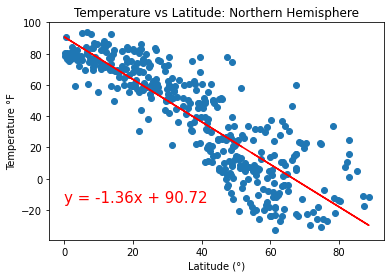

In [12]:
x_values = north_data['Latitude']
y_values = north_data['Temperature \N{DEGREE SIGN}F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.title('Temperature vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Temperature \N{DEGREE SIGN}F')
plt.savefig('output_data/Temperature-vs-Latitude-Northern-Hemisphere.png', format='png')
print('There is a negative correlation between temperature and latitude in the northern hemisphere.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a negative correlation between temperature and latitude in the southern hemisphere. Regression could be improved with more data points near south pole. Lack of cities near there is the issue. Using Latitude/Longitude instead of cities would improve results. 


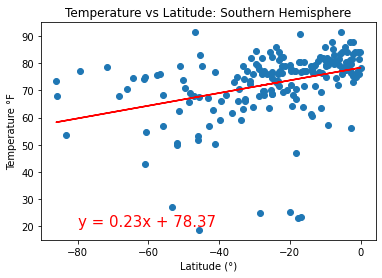

In [13]:
x_values = south_data['Latitude']
y_values = south_data['Temperature \N{DEGREE SIGN}F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.title('Temperature vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Temperature \N{DEGREE SIGN}F')
plt.savefig('output_data/Temperature-vs-Latitude-Southern-Hemisphere.png')
print('There is a negative correlation between temperature and latitude in the southern hemisphere. Regression could be improved with more data points near south pole. Lack of cities near there is the issue. Using Latitude/Longitude instead of cities would improve results. ')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.


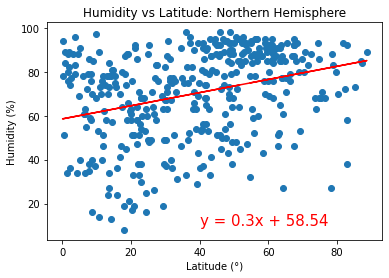

In [14]:
x_values = north_data['Latitude']
y_values = north_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('Humidity vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Humidity-vs-Latitude-Northern-Hemisphere.png')
print('There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.


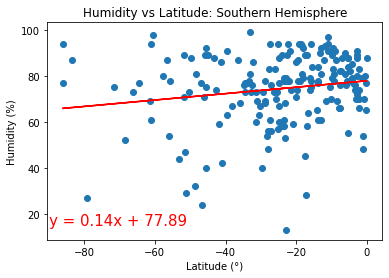

In [15]:
x_values = south_data['Latitude']
y_values = south_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90,15),fontsize=15,color="red")
plt.title('Humidity vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Humidity-vs-Latitude-Southern-Hemisphere.png')
print('There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no observable correlation between cloudiness and latitude.


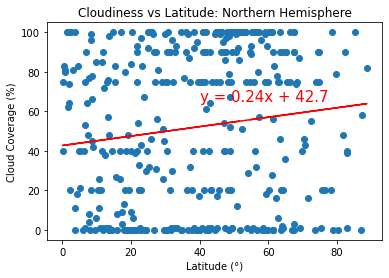

In [16]:
x_values = north_data['Latitude']
y_values = north_data['Cloud Coverage (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,65),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Cloud Coverage (%)')
plt.savefig('output_data/Cloudiness-vs-Latitude-Northern-Hemisphere.png')
print('There is no observable correlation between cloudiness and latitude.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no observable correlation between cloudiness and latitude.


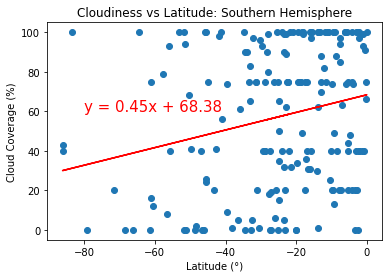

In [17]:
x_values = south_data['Latitude']
y_values = south_data['Cloud Coverage (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,60),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Cloud Coverage (%)')
plt.savefig('output_data/Cloudiness-vs-Latitude-Southern-Hemisphere.png')
print('There is no observable correlation between cloudiness and latitude.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no observable correlation between wind speed and latitude.


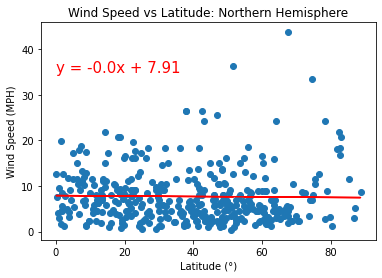

In [18]:
x_values = north_data['Latitude']
y_values = north_data['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.title('Wind Speed vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/Wind-Speed-vs-Latitude-Northern-Hemisphere.png')
print('There is no observable correlation between wind speed and latitude.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no observable correlation between wind speed and latitude.


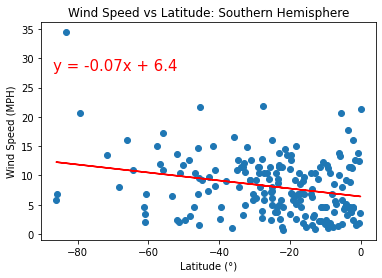

In [19]:
x_values = south_data['Latitude']
y_values = south_data['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-87,28),fontsize=15,color="red")
plt.title('Wind Speed vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/Wind-Speed-vs-Latitude-Southern-Hemisphere.png')
print('There is no observable correlation between wind speed and latitude.')